# Lending Club Case Study

#### Probelm Statement-
    - You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

    - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


### Steps followed to solve the problem:
    1. Import Libraries
    2. Read the Dataset - Shape of the dataset and Data types
    3. Analyse dataset 
        - Check columns for missing values
        - Process Data - Drop columns where more than 40% data is missing
    4. Handling Incorrect data types
        - Remove special characters (%) from data
        - Convert data type to integer or float
    5. Impute Missing Values
        - Remove rows where data is missing (less than 1% data) - As removing this will have no impact on the data set
    6. Sanity checks
        - Check if Data is within the range as expected.
    7. Outlier finding for numerical Data
        - Check for outlier data and process dataset by removing
    8. Derived metrics
        - Create derived metrics from dataset, such as based on Annual Income, Interest rate, Loan amount
    9. Create data set for paid, current and defaulted customers. 
        - Make list of different type of data in the table
    10. Univariate Analysis
        - For numerical columns
        - For Categorical columns
    12. Bivariate Analysis
        - Among Categorical data 
        - From Categorical data with Numerical data
    13. Heatmap of Numerical category


# Import Libraries

Importing all the libraries

In [1278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [948]:
df = pd.read_csv("loan.csv", low_memory=False)
df.head(5)
pd.set_option('display.max_rows', None)

In [949]:
#Check the shape of the dataset
df.shape

(39717, 111)

In [950]:
#Check the data type of each columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

# Analyse dataset

In [951]:
# Find the columns with missing data
col_name = 100*df.isnull().mean(),2
col_name

(id                                  0.000000
 member_id                           0.000000
 loan_amnt                           0.000000
 funded_amnt                         0.000000
 funded_amnt_inv                     0.000000
 term                                0.000000
 int_rate                            0.000000
 installment                         0.000000
 grade                               0.000000
 sub_grade                           0.000000
 emp_title                           6.191303
 emp_length                          2.706650
 home_ownership                      0.000000
 annual_inc                          0.000000
 verification_status                 0.000000
 issue_d                             0.000000
 loan_status                         0.000000
 pymnt_plan                          0.000000
 url                                 0.000000
 desc                               32.585543
 purpose                             0.000000
 title                            

## Check columns for missing values

In [952]:
#List columns with missing datas more than 40%
null_col = []
for col in df.columns:
    if (100*df[col].isnull().mean() >= 40):
        null_col.append(col)

print(null_col)
print("\n\nTotal columns dropped due to data missing: ", len(null_col))

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

### Drop Columns with 40% or more data missing

In [953]:
#From the columns from above list
df = df.drop(null_col, axis=1)

In [954]:
#Check the dataset
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             May-16                        0.0            1       INDIVIDUAL   
3             Apr-16                        0.0            1       INDIVIDUAL   
4             May-16                        0.0            1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 54 columns]

In [955]:
#Check the shape of the data frame
df.shape

(39717, 54)

In [956]:
# Check for missing data in columns
100*df.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [957]:
# Appication Type column can be dropped as its all values are Individual
df.application_type.value_counts()
extra_cols = ["application_type"]

In [958]:
# emp_title can be dropped as it has more unique values whick can't be categorized
df.emp_title.nunique()
extra_cols = ["application_type", "emp_title"]

In [959]:
# id,url and member_id is for identifying individual costomers and has no impact on loan
extra_cols = ["application_type", "emp_title", "id", "member_id","url"]

In [960]:
#desc can be removed as its descriptions
extra_cols = ["application_type", "emp_title", "id", "member_id","url", "desc"]

In [961]:
#pub_rec has more than 0% data as 0 similarly for other coloumns which can be added to extra_cols which will be dropped
df[df["pub_rec"]==0]["pub_rec"].value_counts()/len(df)

pub_rec
0    0.946723
Name: count, dtype: float64

In [962]:
#Remove all extra Columns. These are columns where calues are all 0 or has same values or has user decription-
extra_cols=["acc_now_delinq", "application_type", "chargeoff_within_12_mths", "collection_recovery_fee", "collections_12_mths_ex_med", "delinq_amnt", "desc", "earliest_cr_line", "emp_title", "id", "initial_list_status", "inq_last_6mths", "issue_d", "last_pymnt_amnt", "last_pymnt_d", "member_id", "out_prncp", "out_prncp_inv", "policy_code", "pub_rec", "pub_rec_bankruptcies", "pymnt_plan", "tax_liens", "title", "total_rec_prncp", "url"]
len(extra_cols)

26

In [963]:
# Drop above columns
df = df.drop(extra_cols, axis=1)

In [964]:
# check the shape of the data now
df.shape

(39717, 28)

In [965]:
#Check again for Null data
100*df.isnull().mean()

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
loan_status            0.000000
purpose                0.000000
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
delinq_2yrs            0.000000
open_acc               0.000000
revol_bal              0.000000
revol_util             0.125891
total_acc              0.000000
total_pymnt            0.000000
total_pymnt_inv        0.000000
total_rec_int          0.000000
total_rec_late_fee     0.000000
recoveries             0.000000
last_credit_pull_d     0.005036
dtype: float64

In [966]:
#Check for empty rows with more than 30% missing data
emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
emptyrow

[]

## Handling Incorrect Data Types
- Fill the null values in emp_length with mode and  Change the data type 

In [967]:
#Check data of employee length
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [968]:
# There are 2.7% data in emp_length will null. we will fill this with mode value of emp_length
print(df["emp_length"].mode()[0])
df["emp_length"] = df["emp_length"].fillna(df["emp_length"].mode()[0])

10+ years


In [969]:
#Check data again 
df.emp_length.value_counts()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [970]:
#Remove year from the emp_length values and fill 0 if value is < 1 year and 10 if value is > 10+ years
print(df["emp_length"].value_counts())

def removeyear(x):
    if x == "< 1 year":
        y= 0
    elif x == "10+ years":
        y= 10
    else:
        y= x[0]
    return y
df["emp_length"] = df["emp_length"].apply(removeyear)
df.emp_length.info()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [1186]:
#Find the mode of the employee Length
print(df["emp_length"].mode()[0])

10


In [971]:
#Verify the emp_length data again
df["emp_length"].value_counts()

emp_length
10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [972]:
# Check for null data again
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
open_acc                0
revol_bal               0
revol_util             50
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_int           0
total_rec_late_fee      0
recoveries              0
last_credit_pull_d      2
dtype: int64

### Impute Missing values-
- Drop rows of revol_util and last_credit_pull_d having null value, as null data is very less 

In [973]:
# Drop rows will null values and verify the data for null value
df= df.dropna()
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_int          0
total_rec_late_fee     0
recoveries             0
last_credit_pull_d     0
dtype: int64

In [974]:
#Check the total number of rows and columns in the data
df.shape

(39665, 28)

In [975]:
#Verify Data type again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39665 non-null  int64  
 1   funded_amnt          39665 non-null  int64  
 2   funded_amnt_inv      39665 non-null  float64
 3   term                 39665 non-null  object 
 4   int_rate             39665 non-null  object 
 5   installment          39665 non-null  float64
 6   grade                39665 non-null  object 
 7   sub_grade            39665 non-null  object 
 8   emp_length           39665 non-null  object 
 9   home_ownership       39665 non-null  object 
 10  annual_inc           39665 non-null  float64
 11  verification_status  39665 non-null  object 
 12  loan_status          39665 non-null  object 
 13  purpose              39665 non-null  object 
 14  zip_code             39665 non-null  object 
 15  addr_state           39665 non-null  obje

## Remove percentage(%) Sign from the data

In [976]:
#The column for which percentage is appended, lets remove it and convert to float
perct_col = ["int_rate", "revol_util"]
for col in perct_col:
    df[col]= df[col].apply(lambda x: float(x[:-1]))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39665 non-null  int64  
 1   funded_amnt          39665 non-null  int64  
 2   funded_amnt_inv      39665 non-null  float64
 3   term                 39665 non-null  object 
 4   int_rate             39665 non-null  float64
 5   installment          39665 non-null  float64
 6   grade                39665 non-null  object 
 7   sub_grade            39665 non-null  object 
 8   emp_length           39665 non-null  object 
 9   home_ownership       39665 non-null  object 
 10  annual_inc           39665 non-null  float64
 11  verification_status  39665 non-null  object 
 12  loan_status          39665 non-null  object 
 13  purpose              39665 non-null  object 
 14  zip_code             39665 non-null  object 
 15  addr_state           39665 non-null  obje

In [977]:
#Reset the index
df.reset_index(inplace= True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39665 entries, 0 to 39664
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39665 non-null  int64  
 1   funded_amnt          39665 non-null  int64  
 2   funded_amnt_inv      39665 non-null  float64
 3   term                 39665 non-null  object 
 4   int_rate             39665 non-null  float64
 5   installment          39665 non-null  float64
 6   grade                39665 non-null  object 
 7   sub_grade            39665 non-null  object 
 8   emp_length           39665 non-null  object 
 9   home_ownership       39665 non-null  object 
 10  annual_inc           39665 non-null  float64
 11  verification_status  39665 non-null  object 
 12  loan_status          39665 non-null  object 
 13  purpose              39665 non-null  object 
 14  zip_code             39665 non-null  object 
 15  addr_state           39665 non-null 

### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- loan_amnt should be less than or equal to funded_amnt
- Interest rate should be greater that 0
- revol_util is percentage and should be greater that 0

In [1289]:
# Check loam amount should be less than funded amount
df1 = df[(df["loan_amnt"]) < (df["funded_amnt"])]

In [979]:
df1.shape

(0, 28)

In [980]:
#Check Interest rate should not be less than 0
df1 = df[(df["int_rate"]) <0 ]
df1.shape

(0, 28)

In [981]:
#Check Revolving Utilization rate should not be less than 0
df1 = df[(df["revol_util"]) <0 ]
df1.shape

(0, 28)

In [982]:
#Check the data loan_amnt, funded_amnt and funded_amnt_inv
df[["loan_amnt", "funded_amnt","funded_amnt_inv"]].describe()

loan_amnt   funded_amnt  funded_amnt_inv
count  39665.000000  39665.000000     39665.000000
mean   11228.078911  10955.992058     10406.261853
std     7456.556314   7187.080315      7128.305768
min      500.000000    500.000000         0.000000
25%     5500.000000   5400.000000      5000.000000
50%    10000.000000   9625.000000      8975.000000
75%    15000.000000  15000.000000     14400.000000
max    35000.000000  35000.000000     35000.000000

- From above we can conclude that loan_amount, funded_amount and funded_amnt_inv are almost same, We can use only one of these variable - loan_amnt

## Outlier finding for numerical Data

<Axes: xlabel='int_rate'>

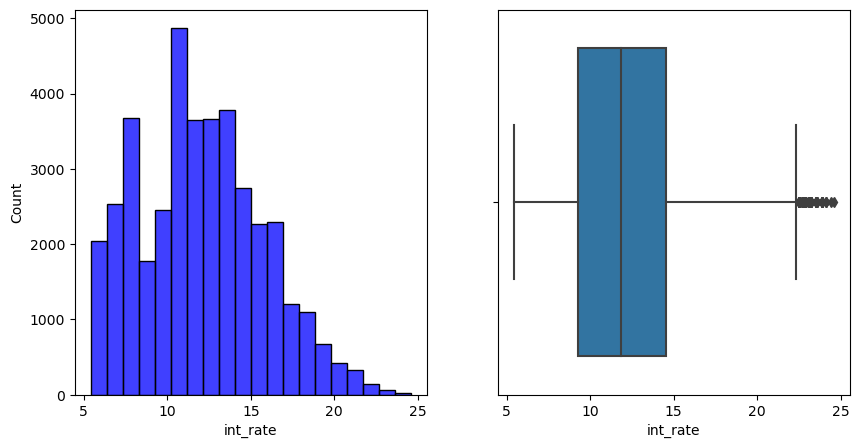

In [983]:
#Find the outliers in the interest rate range
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(df, x="int_rate", bins=20, color='blue',kde=False, ax=axs[0])

sns.boxplot(df, x="int_rate", ax=axs[1])

- Observation 
1. 75% of the interest rates are below 22%, and 50% is below 15% 
2. int_rate can be binned accordingly

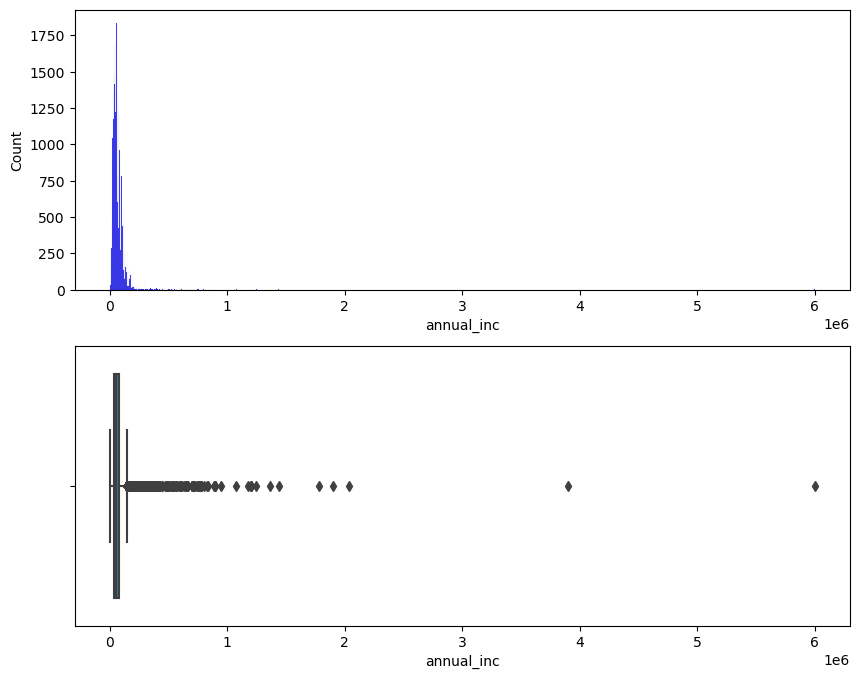

In [1032]:
#Find the outliers in the Annual Income range
fig, axs = plt.subplots(nrows=2, figsize=(10,8))
sns.histplot(df, x="annual_inc",  color='blue',kde=False, ax=axs[0])

sns.boxplot(df, x="annual_inc", ax=axs[1])
plt.show()

In [1037]:
df[df["annual_inc"]>250000]["annual_inc"].value_counts().sum()/len(df)*100

0.758855414093029

- Observation:-
1. Most of the income(99%) is below 250000 and there are few otliers above 300000.
2. Outliers can be discarded, since data is very less and it will have no impact on the data seta 

In [1047]:
# Remove outliers of annual_inc (income > 250000) from data set
df = df[~(df["annual_inc"]>250000)]
df[df["annual_inc"]<250000]["annual_inc"].describe()

count     39319.000000
mean      65785.912818
std       35750.788742
min        4000.000000
25%       40000.000000
50%       58300.000000
75%       81000.000000
max      249999.960000
Name: annual_inc, dtype: float64

In [1054]:
#Check the Debt to Income ratio range
df["dti"].describe()

count    39364.000000
mean        13.370305
std          6.662158
min          0.000000
25%          8.250000
50%         13.470000
75%         18.632500
max         29.990000
Name: dti, dtype: float64

In [835]:
df.home_ownership.value_counts()
print(df_paid.purpose.value_counts(normalize=True)*100)
print(df_default.purpose.value_counts(normalize=True)*100)

purpose
debt_consolidation    46.425642
credit_card           13.622968
other                  9.788850
home_improvement       7.674313
major_purchase         5.842321
car                    4.065016
small_business         3.882728
wedding                2.518609
medical                1.743886
moving                 1.464378
vacation               0.975239
house                  0.935744
educational            0.808142
renewable_energy       0.252165
Name: proportion, dtype: float64
purpose
debt_consolidation    49.233512
other                 11.212121
credit_card            9.643494
small_business         8.449198
home_improvement       6.131907
major_purchase         3.939394
car                    2.834225
medical                1.871658
wedding                1.711230
moving                 1.639929
house                  1.051693
educational            0.998217
vacation               0.944742
renewable_energy       0.338681
Name: proportion, dtype: float64


### Ratio of paid vs default

In [984]:
#Ratio of the number of customer who has paid to Number of customer who has defaulted
round(len(df_paid)/len(df_default),2)

5.87

- Conclusion
 1. The number of customers who has defaulted is almost 1/6th to the customer who has paid fully

## Derived Metrics

In [1051]:
# Creating bins for income amount

#bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
#slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
#       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
#       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000]
slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000','200000-225000','225000-250000']
#print(len(bins))
#print(len(slot))
df['annual_inc_range']=pd.cut(df['annual_inc'],bins,labels=slot)
df['annual_inc_range'].value_counts()


11
10


annual_inc_range
25000-50000      13145
50000-75000      12024
75000-100000      6256
100000-125000     2783
0-25000           2557
125000-150000     1350
150000-175000      570
175000-200000      395
200000-225000      154
225000-250000      130
Name: count, dtype: int64

In [989]:
# Creating bins for loan amount
bins = [0,2500, 5000,7500,10000,12500,15000,17500,20000,22500,25000,27500, 30000, 32500,35000,40000]
slots = ['0-2500', '2500-5000','5000-7500','7500-10000','10000-12500', '12500-15000', '15000-17500','17500-20000','20000-22500','22500-25000','25000-27500','27500-30000','30000-32500','32500-35000','35000 and above']
df['loan_amnt_range']=pd.cut(df['loan_amnt'],bins,labels=slots)
df['loan_amnt_range'].value_counts()

loan_amnt_range
7500-10000         7020
2500-5000          6990
5000-7500          5927
12500-15000        4091
10000-12500        3893
17500-20000        2850
0-2500             2542
22500-25000        2259
15000-17500        1740
20000-22500         740
32500-35000         740
27500-30000         616
25000-27500         169
30000-32500          88
35000 and above       0
Name: count, dtype: int64

<Axes: >

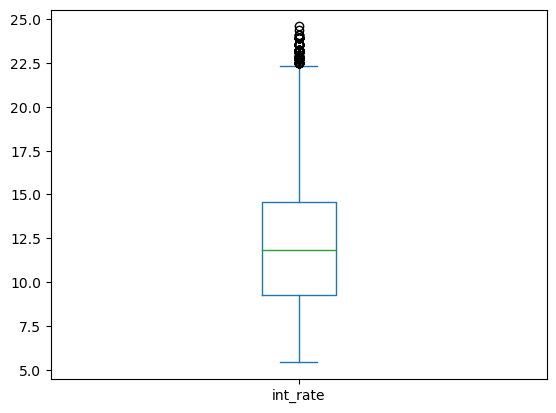

In [1295]:
#Check the interest rate range
df['int_rate'].plot.box()

In [1063]:
# Categorise intrest rates into buckets which will help in bivariate analysis.
df['int_rate_range'] = pd.cut(df['int_rate'], [5,7.5, 10, 12.5, 15, 17.5, 20], labels=['5-7.5', '7.5-10', '10-12.5', '12.5-15','15-17.5','17.5 and above'])
#df[df["int_rate_range"] == "17.5 and above"]["int_rate_range"].value_counts()/len(df)*100
df["int_rate_range"].value_counts()

int_rate_range
10-12.5           9580
12.5-15           9054
7.5-10            6975
5-7.5             5356
15-17.5           5270
17.5 and above    2283
Name: count, dtype: int64

In [1064]:
# categorise dti into buckets for bivariate analysis.
df['dti_range'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '25 and above'])
df.dti_range.value_counts()

dti_range
10-15           9839
15-20           9065
5-10            7960
25 and above    6808
0-5             4843
Name: count, dtype: int64

In [1065]:
#Derived columns for Month and Year from last_credit_pull_d
df["year"]= pd.to_datetime(df["last_credit_pull_d"], format='%b-%y').dt.year
df["month"]= pd.to_datetime(df["last_credit_pull_d"], format='%b-%y').dt.month
print(df["year"].value_counts())
print(df["month"].value_counts())

year
2016    15248
2014     6201
2015     5451
2013     5133
2012     4029
2011     2168
2010      833
2009      225
2008       40
2007       36
Name: count, dtype: int64
month
5     12125
4      4337
3      3266
2      3050
12     2393
11     2207
9      2097
1      2057
10     2045
7      2025
8      2017
6      1745
Name: count, dtype: int64


In [1066]:
#Verify the shape of the data
df.shape

(39364, 34)

## Create data set for paid, current and defaulted customers. Make list of different type of data in the table

In [1067]:
#Create data with only for defaulted users
df_default = df[df["loan_status"] == "Charged Off"]
df_default.shape

(5579, 34)

In [1076]:
#Create data with only for Paid users
df_paid = df[df["loan_status"] == "Fully Paid"]
df_paid.describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  32654.000000  32654.000000     32654.000000  32654.000000   
mean   10804.224597  10559.201782     10056.441308     11.593654   
std     7130.783611   6889.673075      6836.187724      3.593137   
min      500.000000    500.000000         0.000000      5.420000   
25%     5150.000000   5000.000000      5000.000000      8.490000   
50%     9500.000000   9100.000000      8500.000000     11.490000   
75%    15000.000000  14400.000000     13850.000000     13.980000   
max    35000.000000  35000.000000     35000.000000     24.110000   

        installment     annual_inc           dti   delinq_2yrs      open_acc  \
count  32654.000000   32654.000000  32654.000000  32654.000000  32654.000000   
mean     318.242630   66721.906159     13.205149      0.141698      9.281129   
std      204.880419   36504.598518      6.664120      0.482803      4.372488   
min       15.690000    4000.000000      0.000000      0.000000      2.000000   
25%      164.860000   41000.000000      8.050000      0.000000      6.000000   
50%      274.260000   60000.000000     13.250000      0.000000      9.000000   
75%      417.230000   83000.000000     18.450000      0.000000     12.000000   
max     1288.100000  250000.000000     29.990000     11.000000     44.000000   

           revol_bal    revol_util     total_acc   total_pymnt  \
count   32654.000000  32654.000000  32654.000000  32654.000000   
mean    13082.425951     47.529983     22.102713  12650.922692   
std     15590.021303     28.253534     11.379780   8763.707544   
min         0.000000      0.000000      2.000000    526.332241   
25%      3599.250000     23.900000     14.000000   6128.351562   
50%      8653.500000     47.600000     20.000000  10643.346320   
75%     16676.750000     70.800000     29.000000  16904.562525   
max    149588.000000     99.900000     90.000000  58563.679930   

       total_pymnt_inv  total_rec_int  total_rec_late_fee  recoveries  \
count     32654.000000   32654.000000        32654.000000     32654.0   
mean      12037.171283    2090.862325            0.865049         0.0   
std        8666.026898    2334.862578            5.717281         0.0   
min           0.000000       6.220000            0.000000         0.0   
25%        5716.525000     657.092500            0.000000         0.0   
50%        9954.845000    1294.530000            0.000000         0.0   
75%       16202.190000    2631.400000            0.000000         0.0   
max       58563.680000   23563.680000          165.690000         0.0   

               year         month  
count  32654.000000  32654.000000  
mean    2014.263919      5.846144  
std        1.762170      3.097172  
min     2007.000000      1.000000  
25%     2013.000000      4.000000  
50%     2015.000000      5.000000  
75%     2016.000000      8.000000  
max     2016.000000     12.000000

In [1069]:
df_current = df[df["loan_status"] == "Current"]
df_current.shape

(1131, 34)

In [1070]:
df["loan_status"].value_counts()

loan_status
Fully Paid     32654
Charged Off     5579
Current         1131
Name: count, dtype: int64

In [1131]:
#List all categorcial columns
category_col =df.select_dtypes(include=['object','category']).columns
print(category_col)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'last_credit_pull_d', 'int_rate_range', 'dti_range',
       'annual_inc_range', 'loan_amnt_range'],
      dtype='object')


In [1132]:
#List all numerical columns
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_col)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'year', 'month']


# Univariate Analysis

## Segemented Univariate Analysis on categorical variable

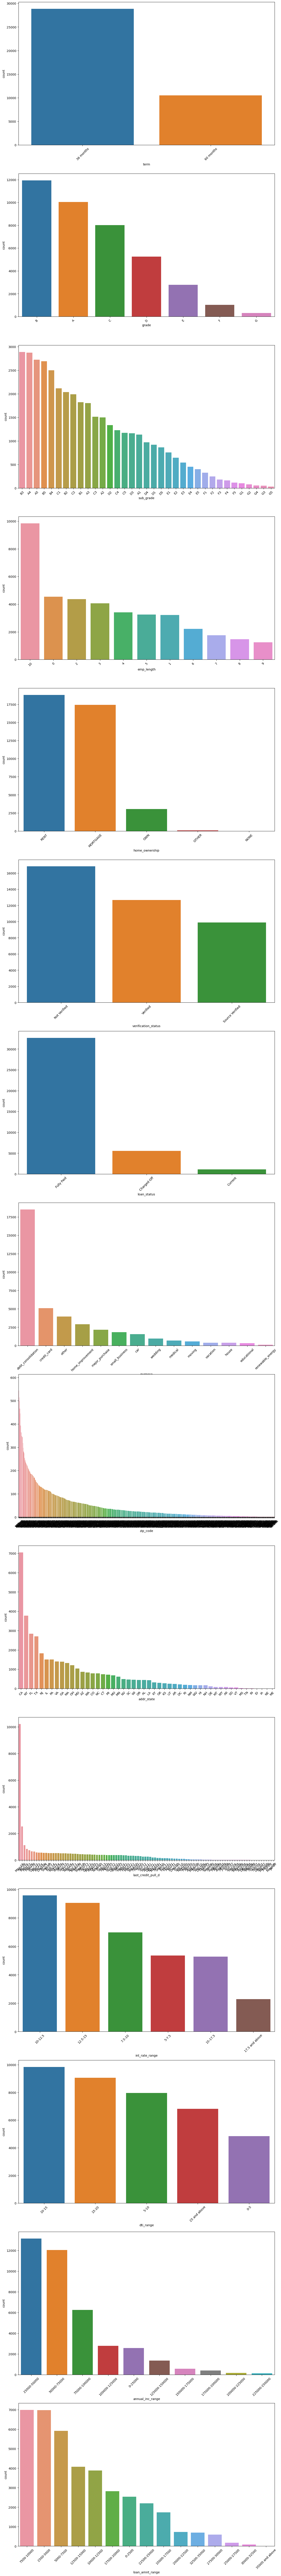

In [1296]:
#Plotitng countplot on categorical variable 
fig, axs = plt.subplots(ncols=1, nrows=len(category_col), figsize=(15,150))
for n, col in enumerate(category_col):
    sns.countplot(data=df, x=col, ax=axs[n], order = df[col].value_counts().index)
    #sns.countplot(data=df_default, x=col, ax=axs[n][1],  order = df[col].value_counts().index)
    axs[n].tick_params(axis='x', rotation=45)
    #axs[n][1].tick_params(axis='x', rotation=90)
plt.show()

###### Conclusion :-
    1. More people are opting for short term team (36 months) loan.
    2. There more loans in grade B, followed by grade A and C
    3. Similary subgrades of A and B has more loans
    4. There are more customer from 10+ years of experience
    5. People who are on Rent and has Mortgage are more likely to take loan
    6. More loans are for Deb Consolidation
    7. Most loans are from state CA
    8. Most loans are in the range for 10-15%
    9. People in 25000-75000 annual income range is more likely to take loan
    10. Most of the loan is in the range of 2500-5000 and 7500-10000

## Univariate analysis of numerical variable

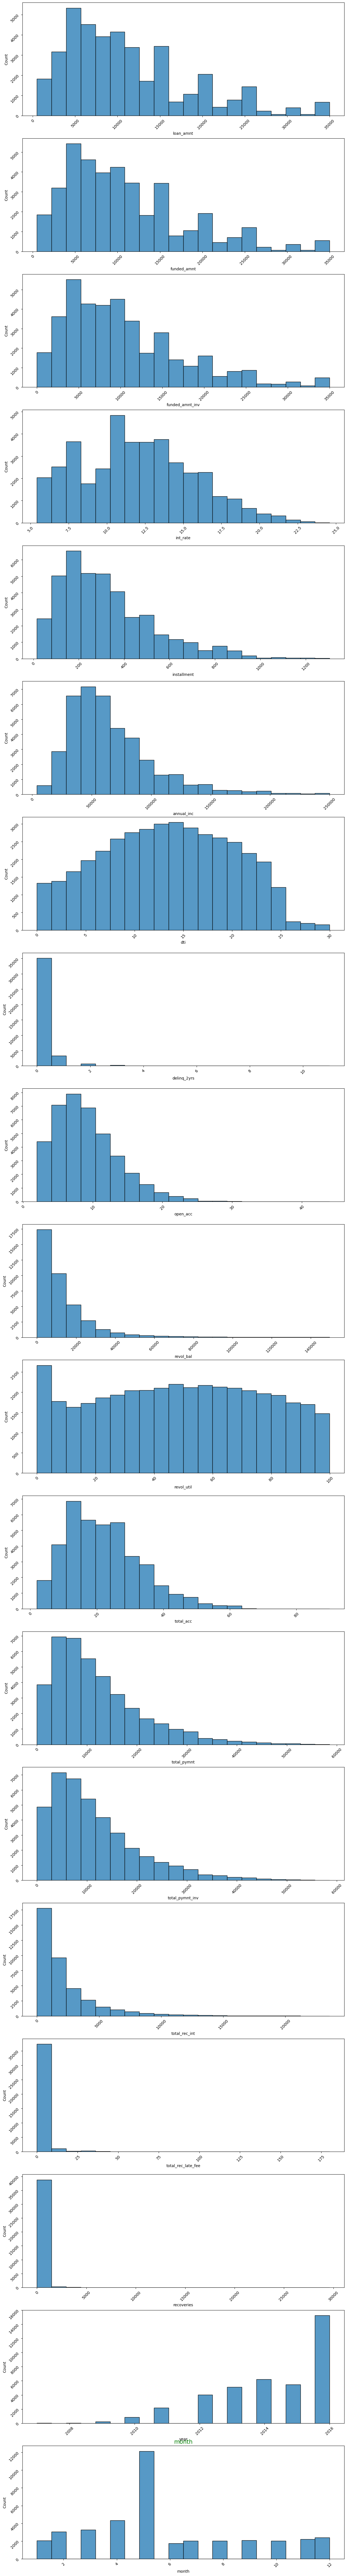

In [1075]:
#Plotitng countplot on numerical variable 
fig, axs = plt.subplots(ncols=1, nrows=len(numerical_col), figsize=(15,120))
for n, col in enumerate(numerical_col):
    sns.histplot(data=df, x=col, ax=axs[n],bins=20)
    #sns.histplot(data=df_default, x=col, ax=axs[n],bins=20)
    plt.title(col, fontdict={'color': 'green', 'fontsize':15})
    axs[n].tick_params(labelrotation=45);
plt.show()

###### Conclusion :-
    1. Most of the funded and loan amount is around 5000
    2. Most loan is in the range of 10.5%
    3. Hisghest installment is in the range of 200
    4. People near annual income of 50000 applies for most loan 
    5. Most people had Revolving balance of around 5000.
    6. Most of the data is from 2016.
    

### Correlation and heatmap

In [1133]:
# Find the correlation between numerical data
df_corr = df.corr(numeric_only=True)
df_corr

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt            1.000000     0.981540         0.939789  0.308816   
funded_amnt          0.981540     1.000000         0.958227  0.312533   
funded_amnt_inv      0.939789     0.958227         1.000000  0.306742   
int_rate             0.308816     0.312533         0.306742  1.000000   
installment          0.929778     0.955805         0.904389  0.282631   
annual_inc           0.415062     0.410291         0.392774  0.076595   
dti                  0.073656     0.073354         0.081470  0.114273   
delinq_2yrs         -0.034172    -0.034490        -0.040701  0.157151   
open_acc             0.173285     0.171436         0.158878  0.008345   
revol_bal            0.312776     0.304982         0.286136  0.093686   
revol_util           0.066724     0.070512         0.075459  0.468043   
total_acc            0.250303     0.244332         0.236737 -0.047291   
total_pymnt          0.885482     0.902087         0.879919  0.307823   
total_pymnt_inv      0.852972     0.869580         0.912272  0.303347   
total_rec_int        0.729483     0.737344         0.730418  0.530345   
total_rec_late_fee   0.045718     0.047821         0.028020  0.093551   
recoveries           0.136580     0.137280         0.125221  0.122912   
year                 0.077432     0.078993         0.127383  0.081348   
month               -0.024211    -0.025759        -0.023265 -0.020680   

                    installment  annual_inc       dti  delinq_2yrs  open_acc  \
loan_amnt              0.929778    0.415062  0.073656    -0.034172  0.173285   
funded_amnt            0.955805    0.410291  0.073354    -0.034490  0.171436   
funded_amnt_inv        0.904389    0.392774  0.081470    -0.040701  0.158878   
int_rate               0.282631    0.076595  0.114273     0.157151  0.008345   
installment            1.000000    0.413398  0.061575    -0.022247  0.168744   
annual_inc             0.413398    1.000000 -0.113529     0.030288  0.256299   
dti                    0.061575   -0.113529  1.000000    -0.033612  0.292438   
delinq_2yrs           -0.022247    0.030288 -0.033612     1.000000  0.011771   
open_acc               0.168744    0.256299  0.292438     0.011771  1.000000   
revol_bal              0.306306    0.423576  0.241951    -0.058905  0.288088   
revol_util             0.096610    0.041109  0.279136    -0.042894 -0.090620   
total_acc              0.224037    0.370954  0.235935     0.066632  0.685923   
total_pymnt            0.855636    0.394510  0.072018    -0.025106  0.158511   
total_pymnt_inv        0.815899    0.379439  0.078692    -0.031457  0.148799   
total_rec_int          0.634191    0.283929  0.111917     0.021477  0.120596   
total_rec_late_fee     0.057645    0.012865 -0.011305     0.031150 -0.017772   
recoveries             0.118733    0.037752  0.025392     0.012129  0.015951   
year                   0.036487    0.030213  0.118594    -0.004221  0.067707   
month                 -0.018012   -0.024993 -0.015783    -0.003511 -0.025098   

                    revol_bal  revol_util  total_acc  total_pymnt  \
loan_amnt            0.312776    0.066724   0.250303     0.885482   
funded_amnt          0.304982    0.070512   0.244332     0.902087   
funded_amnt_inv      0.286136    0.075459   0.236737     0.879919   
int_rate             0.093686    0.468043  -0.047291     0.307823   
installment          0.306306    0.096610   0.224037     0.855636   
annual_inc           0.423576    0.041109   0.370954     0.394510   
dti                  0.241951    0.279136   0.235935     0.072018   
delinq_2yrs         -0.058905   -0.042894   0.066632    -0.025106   
open_acc             0.288088   -0.090620   0.685923     0.158511   
revol_bal            1.000000    0.306274   0.310367     0.287057   
revol_util           0.306274    1.000000  -0.071645     0.079634   
total_acc            0.310367   -0.071645   1.000000     0.219158   
total_pymnt          0.287057    0.079634   0.219158     1.00

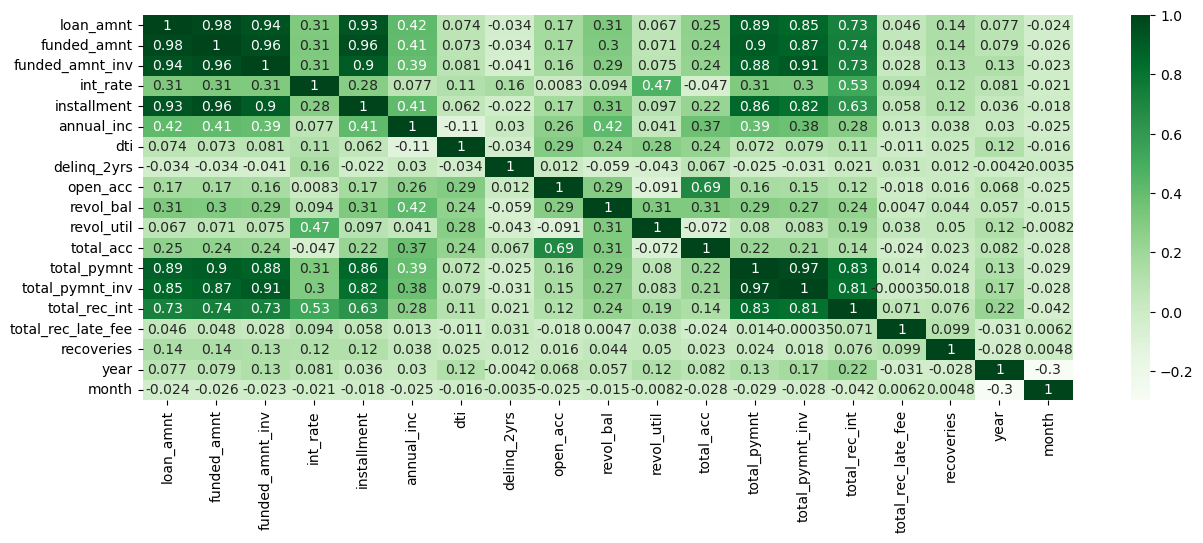

In [1134]:
# Plot Heatmap using correlation data
plt.figure(figsize=[15,5])
sns.heatmap(df_corr, cmap="Greens", annot=True)
plt.show()

#### Conclusion :-
    1. There are few strong correlations
    - funded_amnt and loan_amnt : This makes sense as more higher loan amount will lead to more Funding
    - similary total_payment and loan_amnt
    - loan amount and total recieved intereset

# Bivariate Analysis

### 1. Based on Loan status vs Grade

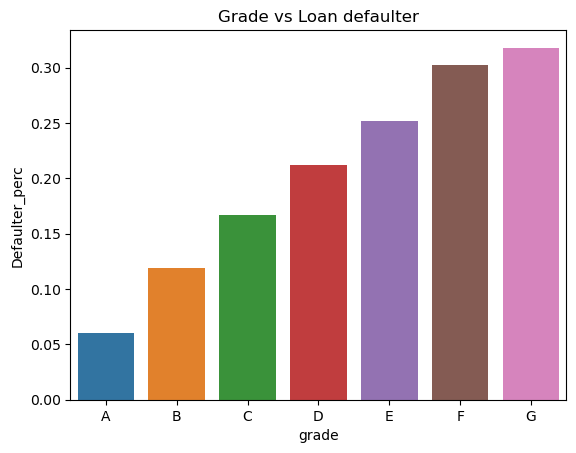

loan_status grade  Charged Off  Current  Fully Paid  Defaulter_perc
0               A          602       40        9395        0.059978
1               B         1416      344       10180        0.118593
2               C         1338      262        6420        0.166833
3               D         1113      218        3917        0.212081
4               E          703      178        1907        0.252152
5               F          310       72         644        0.302144
6               G           97       17         191        0.318033

In [1228]:
#Analysis based on Grade and Loan status
# This is calcultaed by grouping Grade and Loan Status together 
grade_and_loan_data = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_and_loan_data['Defaulter_perc'] = grade_and_loan_data['Charged Off'] / (grade_vs_loan['Charged Off']+grade_and_loan_data['Current']+grade_vs_loan['Fully Paid'])
grade_and_loan_data.sort_values('Defaulter_perc', ascending=False)
plot = sns.barplot(x='grade', y='Defaulter_perc', data=grade_and_loan_data)
plot.set_title("Grade vs Loan defaulter")
plt.show()
grade_and_loan_data

- Inference
    * As the Grade goes from A to G, the probability of default increases

### 2. Based on Loan status vs term

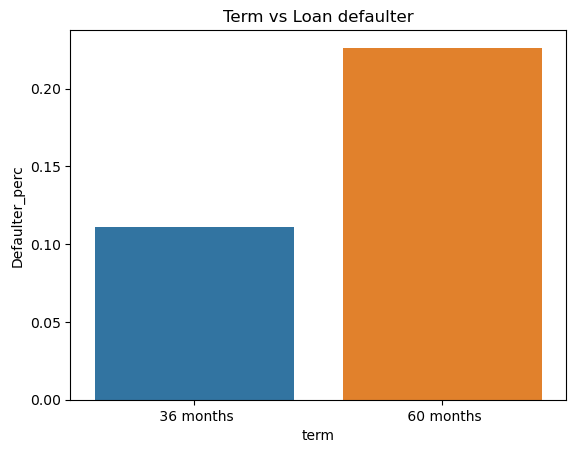

In [1138]:
# Analysis based on term and Loan status
# This is calcultaed by grouping Term and Loan Status together 
term_and_loan_data = df.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
term_and_loan_data['Defaulter_perc'] = term_and_loan_data['Charged Off'] / (term_and_loan_data['Charged Off']+term_and_loan_data['Current']+term_and_loan_data['Fully Paid'])
term_and_loan_data.sort_values('Defaulter_perc', ascending=False)
term_and_loan_data
plot = sns.barplot(x='term', y='Defaulter_perc', data=term_and_loan_data)
plot.set_title("Term vs Loan defaulter")
plt.show()

- Inference
    * There are more probability of default in 60 months loan

### 3. Based on Loan status vs emp_length

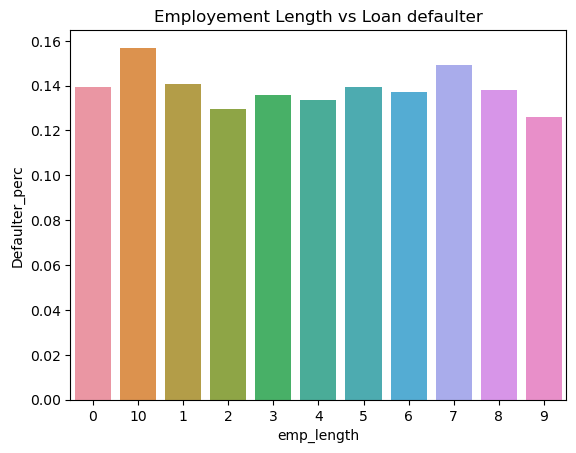

In [1146]:
# Analysis based on emp_length and Loan status
# This is calcultaed by grouping Term and Loan Status together 
empLen_and_loan_data = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
empLen_and_loan_data['Defaulter_perc'] = empLen_and_loan_data['Charged Off'] / (empLen_and_loan_data['Charged Off']+empLen_and_loan_data['Current']+empLen_and_loan_data['Fully Paid'])
empLen_and_loan_data.sort_values('Defaulter_perc', ascending=False)
plot = sns.barplot(x='emp_length', y='Defaulter_perc', data=empLen_and_loan_data)
plot.set_title("Employement Length vs Loan defaulter")
plt.show()

- Inference
    * There is no conclusion from employee Length and default and all are almost same 

### 5. Based on Loan status vs home ownership

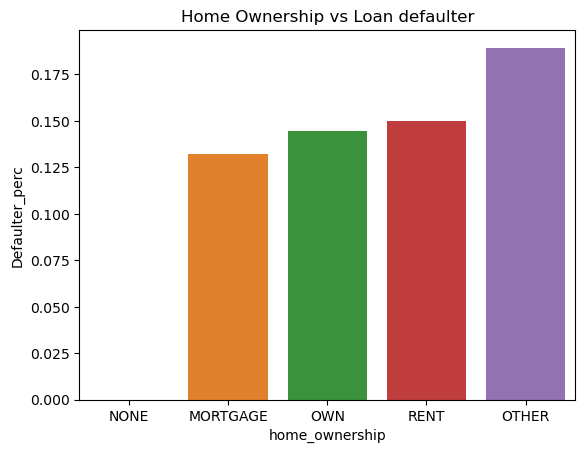

loan_status home_ownership  Charged Off  Current  Fully Paid  Defaulter_perc
1                     NONE          0.0      0.0         3.0        0.000000
0                 MORTGAGE       2305.0    631.0     14500.0        0.132198
3                      OWN        438.0     83.0      2510.0        0.144507
4                     RENT       2818.0    417.0     15564.0        0.149902
2                    OTHER         18.0      0.0        77.0        0.189474

In [1229]:
# Analysis based on Home Ownership and Loan status
# This is calcultaed by grouping Home Ownership and Loan Status together 
home_and_loan_data = df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_and_loan_data['Defaulter_perc'] = home_and_loan_data['Charged Off'] / (home_and_loan_data['Charged Off']+home_and_loan_data['Current']+home_and_loan_data['Fully Paid'])
home_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='home_ownership', y='Defaulter_perc', data=home_and_loan_data)
plot.set_title("Home Ownership vs Loan defaulter")
plt.show()
home_and_loan_data

- Inference
    * There are more probability of default if Home Ownership is OTHER

### 6. Based on Loan status vs purpose

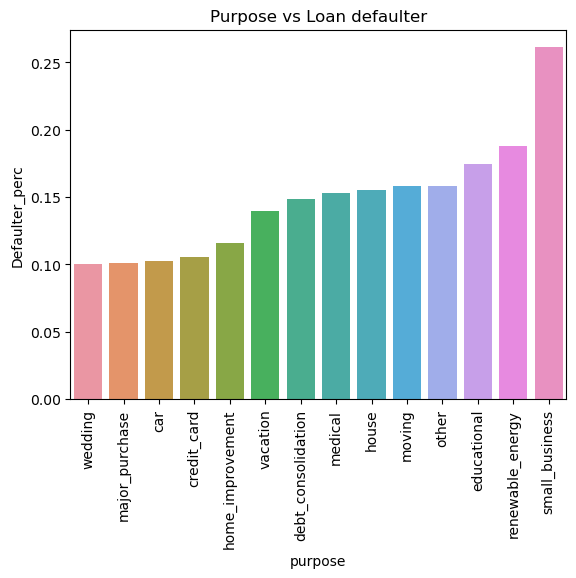

In [1160]:
# Analysis based on Purpose and Loan status
# This is calcultaed by grouping Purpose and Loan Status together 
purpose_and_loan_data = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_and_loan_data['Defaulter_perc'] = purpose_and_loan_data['Charged Off'] / (purpose_and_loan_data['Charged Off']+purpose_and_loan_data['Current']+purpose_and_loan_data['Fully Paid'])
purpose_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='purpose', y='Defaulter_perc', data=purpose_and_loan_data)
plot.set_title("Purpose vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
#purpose_and_loan_data

- Inference
    * SMALL BUSINESS has highest default percentage and its more risky.
    * This is followed by renewable_energy and educational

### 7. Based on Loan status vs Annual Income Range

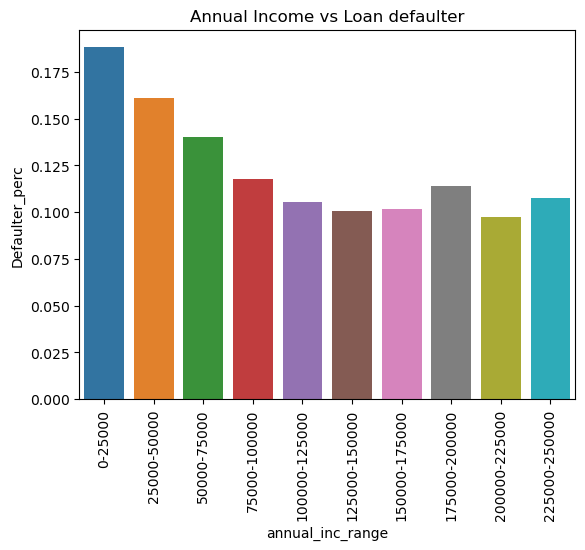

In [1170]:
# Analysis based on Annual Income Range and Loan status
# This is calcultaed by grouping Annual Income and Loan Status together 
income_and_loan_data = df.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
income_and_loan_data['Defaulter_perc'] = income_and_loan_data['Charged Off'] / (income_and_loan_data['Charged Off']+income_and_loan_data['Current']+income_and_loan_data['Fully Paid'])
income_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='annual_inc_range', y='Defaulter_perc', data=income_and_loan_data)
plot.set_title("Annual Income vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
#income_and_loan_data

- Inference
    * There are almost 18% default in annual income range for upto 25000, and 16% in range 25000-50000 bank should be more vigilant on giving loan to them

### 8. Based on Loan status vs Loan Amount Range

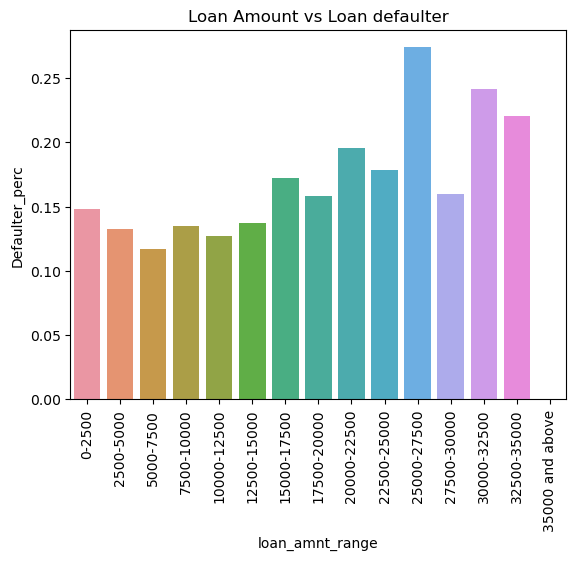

In [1231]:
# Analysis based on Annual Income Range and Loan status
# This is calcultaed by grouping Annual Income and Loan Status together 
loanDisbur_and_loan_data = df.groupby(['loan_amnt_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loanDisbur_and_loan_data['Defaulter_perc'] = loanDisbur_and_loan_data['Charged Off'] / (loanDisbur_and_loan_data['Charged Off']+loanDisbur_and_loan_data['Current']+loanDisbur_and_loan_data['Fully Paid'])
loanDisbur_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='loan_amnt_range', y='Defaulter_perc', data=loanDisbur_and_loan_data)
plot.set_title("Loan Amount vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
#loanDisbur_and_loan_data

- Inference
    * There are more probability of default if loan amount is range 25000-27500 and 30000 and above

### 9. Based on Loan status vs Interest Rate Range

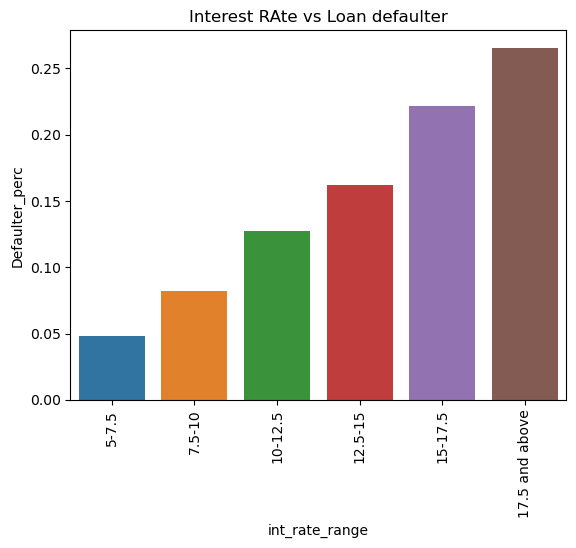

In [1175]:
# Analysis based on Interest rate and Loan status
# This is calcultaed by grouping Interest rate range and Loan Status together 
int_and_loan_data = df.groupby(['int_rate_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_and_loan_data['Defaulter_perc'] = int_and_loan_data['Charged Off'] / (int_and_loan_data['Charged Off']+int_and_loan_data['Current']+int_and_loan_data['Fully Paid'])
int_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='int_rate_range', y='Defaulter_perc', data=int_and_loan_data)
plot.set_title("Interest RAte vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
#int_and_loan_data

- Inference
    * There is more probability of default with increase in Interest rate.

### 10. Based on Loan status vs Address State

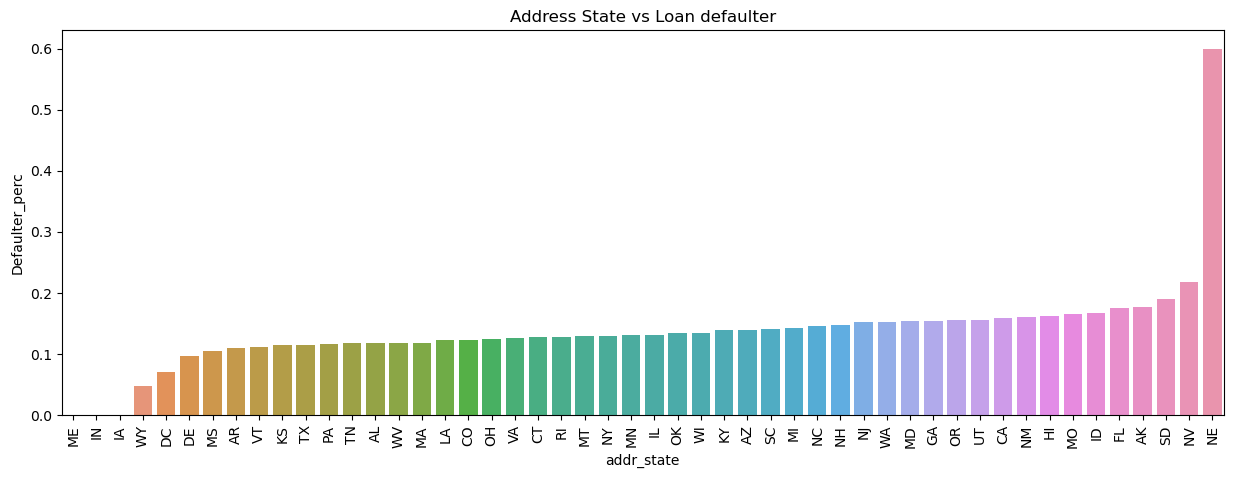

loan_status addr_state  Charged Off  Current  Fully Paid  Defaulter_perc
21                  ME          0.0      0.0         3.0        0.000000
15                  IN          0.0      0.0         9.0        0.000000
12                  IA          0.0      0.0         5.0        0.000000
49                  WY          4.0      3.0        76.0        0.048193
7                   DC         15.0      3.0       194.0        0.070755
8                   DE         11.0      1.0       101.0        0.097345
25                  MS          2.0      0.0        17.0        0.105263
2                   AR         27.0     10.0       207.0        0.110656
45                  VT          6.0      1.0        47.0        0.111111
16                  KS         31.0     16.0       223.0        0.114815
42                  TX        311.0     67.0      2322.0        0.115185
37                  PA        177.0     49.0      1280.0        0.117530
41                  TN          2.0      0.0        15.0        0.117647
1                   AL         53.0     17.0       378.0        0.118304
48                  WV         21.0      5.0       151.0        0.118644
19                  MA        157.0     42.0      1124.0        0.118670
18                  LA         53.0      9.0       367.0        0.123543
5                   CO         97.0     26.0       660.0        0.123883
34                  OH        151.0     45.0      1018.0        0.124382
44                  VA        176.0     38.0      1184.0        0.125894
6                   CT         94.0     24.0       620.0        0.127371
38                  RI         25.0      4.0       167.0        0.127551
26                  MT         11.0      2.0        72.0        0.129412
33                  NY        490.0    113.0      3172.0        0.129801
23                  MN         80.0     10.0       522.0        0.130719
14                  IL        197.0     47.0      1263.0        0.130723
35                  OK         40.0     12.0       246.0        0.134228
47                  WI         62.0     20.0       376.0        0.135371
17                  KY         45.0     13.0       266.0        0.138889
3                   AZ        121.0     30.0       719.0        0.139080
39                  SC         66.0     13.0       390.0        0.140725
22                  MI        102.0     16.0       597.0        0.142657
27                  NC        114.0     38.0       630.0        0.145780
29                  NH         25.0      5.0       139.0        0.147929
30                  NJ        278.0     59.0      1489.0        0.152245
46                  WA        127.0     22.0       685.0        0.152278
20                  MD        160.0     26.0       849.0        0.154589
10                  GA        215.0     38.0      1136.0        0.154788
36                  OR         70.0     16.0       364.0        0.155556
43                  UT         40.0      6.0       211.0        0.155642
4                   CA       1117.0    150.0      5776.0        0.158597
31                  NM         30.0      5.0       151.0        0.161290
11                  HI         28.0      8.0       137.0        0.161850
24                  MO        113.0     16.0       552.0        0.165932
13                  ID          1.0      0.0         5.0        0.166667
9                   FL        498.0     85.0      2257.0        0.175352
0                   AK         14.0      2.0        63.0        0.177215
40                  SD         12.0      2.0        49.0        0.190476
32                  NV        107.0     17.0       368.0        0.217480
28                  NE          3.0      0.0         2.0        0.600000

In [1232]:
# Analysis based on Address State and Loan status
# This is calcultaed by grouping Address State and Loan Status together 
plt.figure(figsize=[15,5])
state_and_loan_data = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_and_loan_data['Defaulter_perc'] = state_and_loan_data['Charged Off'] / (state_and_loan_data['Charged Off']+state_and_loan_data['Current']+state_and_loan_data['Fully Paid'])
state_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='addr_state', y='Defaulter_perc', data=state_and_loan_data)
plot.set_title("Address State vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
state_and_loan_data

- Inference
    * Although there is high percentage of default from state NE, but data is too small to conclude any thing

### 11. Based on Loan status vs Zip Code

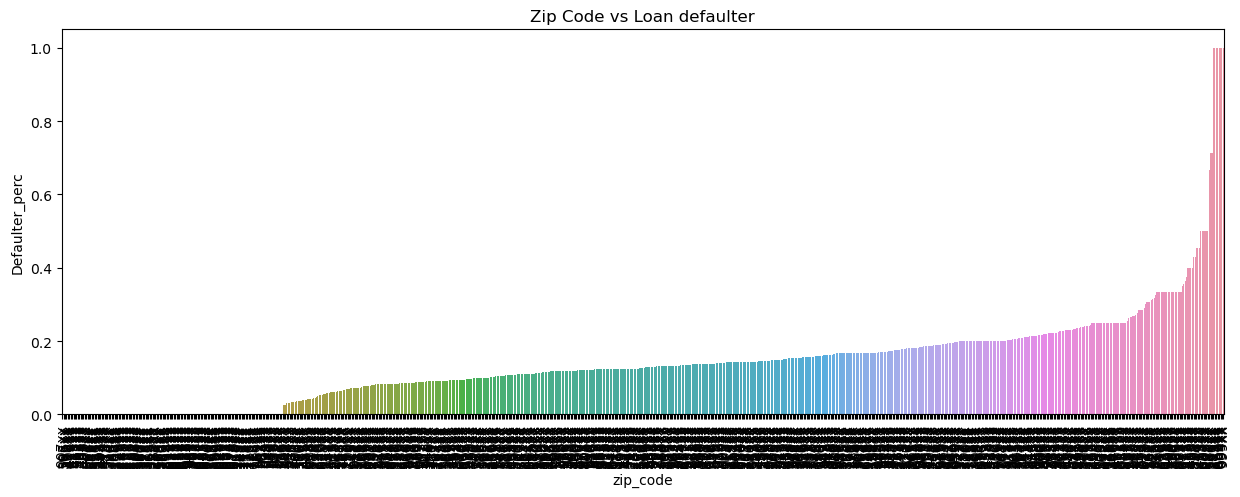

loan_status zip_code  Charged Off  Current  Fully Paid  Defaulter_perc
0              007xx          0.0      0.0         1.0        0.000000
353            395xx          0.0      0.0         3.0        0.000000
354            396xx          0.0      0.0         1.0        0.000000
355            397xx          0.0      0.0         1.0        0.000000
356            398xx          0.0      1.0         4.0        0.000000
365            408xx          0.0      0.0         1.0        0.000000
369            412xx          0.0      0.0         2.0        0.000000
371            414xx          0.0      0.0         1.0        0.000000
372            415xx          0.0      0.0         3.0        0.000000
377            423xx          0.0      1.0         3.0        0.000000
406            455xx          0.0      0.0         6.0        0.000000
410            461xx          0.0      0.0         2.0        0.000000
821            998xx          0.0      0.0        10.0        0.000000
412            463xx          0.0      0.0         1.0        0.000000
413            465xx          0.0      0.0         1.0        0.000000
414            468xx          0.0      0.0         2.0        0.000000
415            469xx          0.0      0.0         1.0        0.000000
416            471xx          0.0      0.0         1.0        0.000000
477            567xx          0.0      0.0         2.0        0.000000
476            566xx          0.0      0.0         7.0        0.000000
466            556xx          0.0      0.0         1.0        0.000000
454            542xx          0.0      0.0         3.0        0.000000
450            538xx          0.0      0.0         6.0        0.000000
443            528xx          0.0      0.0         2.0        0.000000
350            391xx          0.0      0.0         2.0        0.000000
442            527xx          0.0      0.0         4.0        0.000000
440            522xx          0.0      0.0         1.0        0.000000
433            493xx          0.0      0.0         9.0        0.000000
431            491xx          0.0      0.0         5.0        0.000000
419            479xx          0.0      0.0         1.0        0.000000
418            474xx          0.0      0.0         3.0        0.000000
417            473xx          0.0      0.0         1.0        0.000000
441            523xx          0.0      0.0         1.0        0.000000
482            574xx          0.0      0.0         5.0        0.000000
349            390xx          0.0      0.0         2.0        0.000000
347            386xx          0.0      0.0         1.0        0.000000
159            185xx          0.0      0.0        19.0        0.000000
162            188xx          0.0      0.0         5.0        0.000000
169            196xx          0.0      0.0        19.0        0.000000
206            237xx          0.0      0.0        10.0        0.000000
208            239xx          0.0      1.0         2.0        0.000000
215            246xx          0.0      1.0         5.0        0.000000
216            247xx          0.0      1.0         5.0        0.000000
217            248xx          0.0      0.0         1.0        0.000000
218            249xx          0.0      0.0         3.0        0.000000
219            250xx          0.0      0.0         2.0        0.000000
220            251xx          0.0      0.0         8.0        0.000000
221            252xx          0.0      0.0         1.0        0.000000
225            256xx          0.0      1.0         4.0        0.000000
229            260xx          0.0      0.0        19.0        0.000000
231            262xx          0.0      0.0         4.0        0.000000
232            263xx          0.0      0.0         5.0        0.000000
235            266xx          0.0      0.0         1.0        0.000000
345            384xx          0.0      0.0         1.0        0.000000
344            383xx          0.0      0.0         1.0        0.000000
343            381xx    

In [1233]:
# Analysis based on Zip Code and Loan status
# This is calcultaed by grouping ZIP Code and Loan Status together 
plt.figure(figsize=[15,5])
zip_and_loan_data = df.groupby(['zip_code', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
zip_and_loan_data['Defaulter_perc'] = zip_and_loan_data['Charged Off'] / (zip_and_loan_data['Charged Off']+zip_and_loan_data['Current']+zip_and_loan_data['Fully Paid'])
zip_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='zip_code', y='Defaulter_perc', data=zip_and_loan_data)
plot.set_title("Zip Code vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
zip_and_loan_data

- Inference
    * Data set is too small to conclude based on ZIP Code

### 12. Based on Loan status vs Verification status

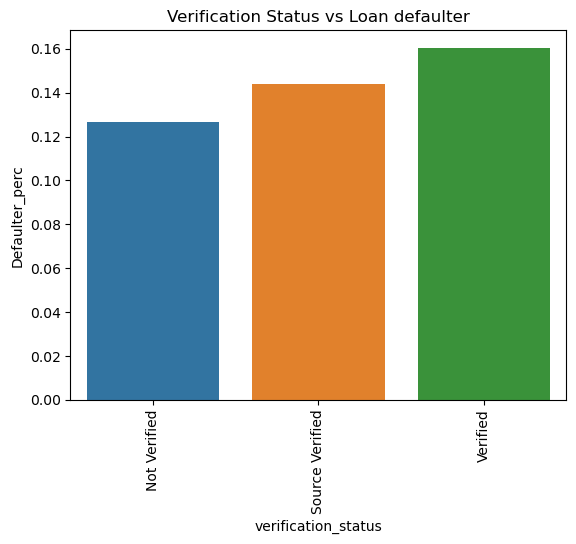

loan_status verification_status  Charged Off  Current  Fully Paid  \
0                  Not Verified         2126      227       14464   
1               Source Verified         1421      307        8154   
2                      Verified         2032      597       10036   

loan_status  Defaulter_perc  
0                  0.126420  
1                  0.143797  
2                  0.160442

In [1184]:
# Analysis based on Verification Status and Loan status
# This is calcultaed by grouping Verification Status and Loan Status together 
verif_and_loan_data = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verif_and_loan_data['Defaulter_perc'] = verif_and_loan_data['Charged Off'] / (verif_and_loan_data['Charged Off']+verif_and_loan_data['Current']+verif_and_loan_data['Fully Paid'])
verif_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='verification_status', y='Defaulter_perc', data=verif_and_loan_data)
plot.set_title("Verification Status vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
verif_and_loan_data

- Inference
    * Defaulters are not showing any significant percentage change between groups, its inconclusive

### 13. Based on Loan status vs DTI

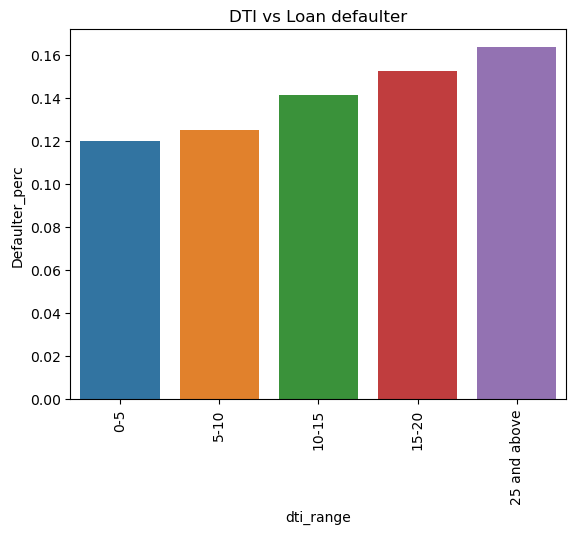

loan_status     dti_range  Charged Off  Current  Fully Paid  Defaulter_perc
0                     0-5          580       90        4173        0.119760
1                    5-10          997      194        6769        0.125251
2                   10-15         1390      268        8181        0.141275
3                   15-20         1384      284        7397        0.152675
4            25 and above         1114      237        5457        0.163631

In [1237]:
# Analysis based on Debt to Income ratio range and Loan status
# This is calcultaed by grouping DTI Range and Loan Status together 
dti_and_loan_data = df.groupby(['dti_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_and_loan_data['Defaulter_perc'] = dti_and_loan_data['Charged Off'] / (dti_and_loan_data['Charged Off']+dti_and_loan_data['Current']+dti_and_loan_data['Fully Paid'])
dti_and_loan_data.sort_values('Defaulter_perc', ascending=True, inplace=True)
plot = sns.barplot(x='dti_range', y='Defaulter_perc', data=dti_and_loan_data)
plot.set_title("DTI vs Loan defaulter")
plt.xticks(rotation=90)
plt.show()
dti_and_loan_data

- Inference
    * There is more probability of default with increase in DTI, but the data variation is small to be conclude

## Bivariate Analysis of Purpose with Other numerical columns

- From the upper Bivariate analysis its clear that Small Businnes is the riskiest of all. So will try to find out more if purpose is relate to other numerical data

### 1. Purpose vs Annual Income

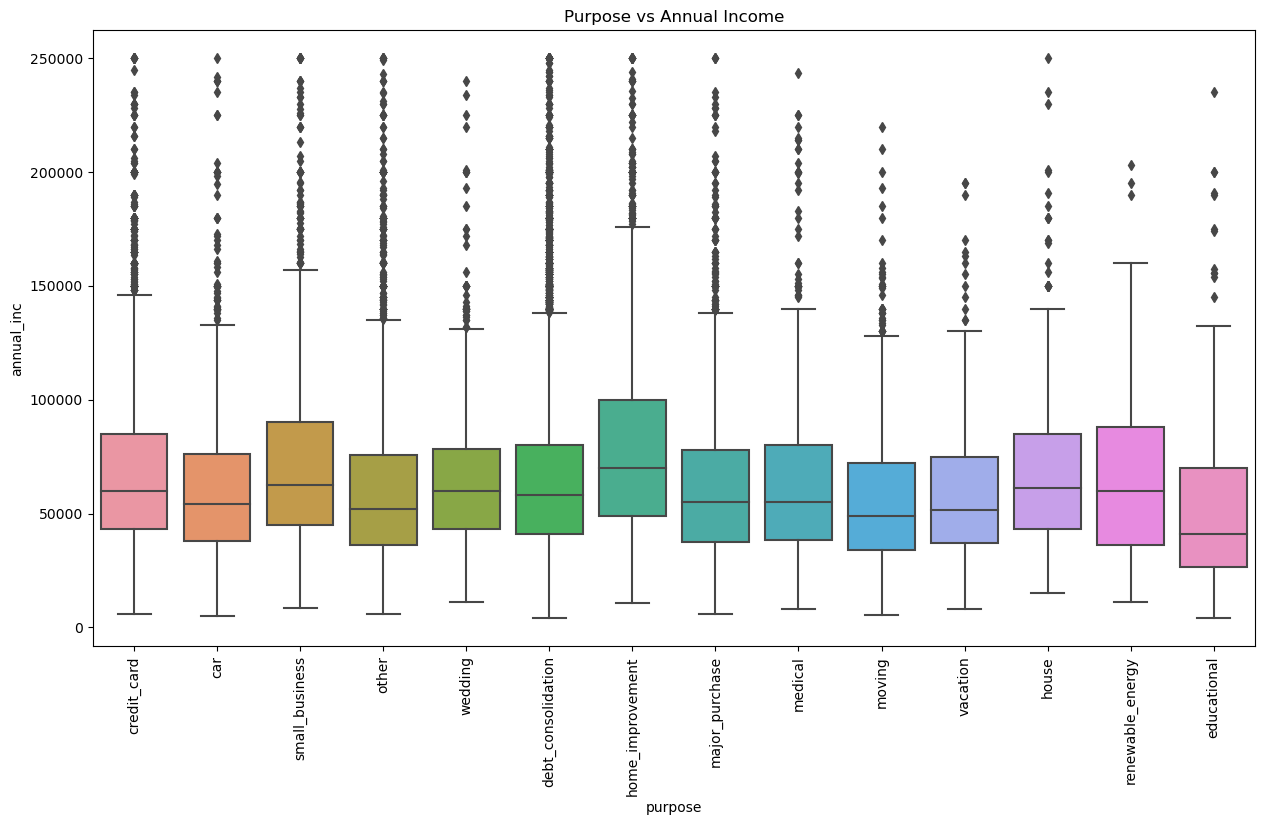

In [1234]:
plt.figure(figsize=[15,8])
plot= sns.boxplot(data=df, x="purpose", y="annual_inc"### 13. Based on Loan status vs DTI)
plot.set_title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

#### Conclusion:-
    - People needing loan for small_business and home_improvement has higher Annual Income

### 2. Purpose vs Interest Rate

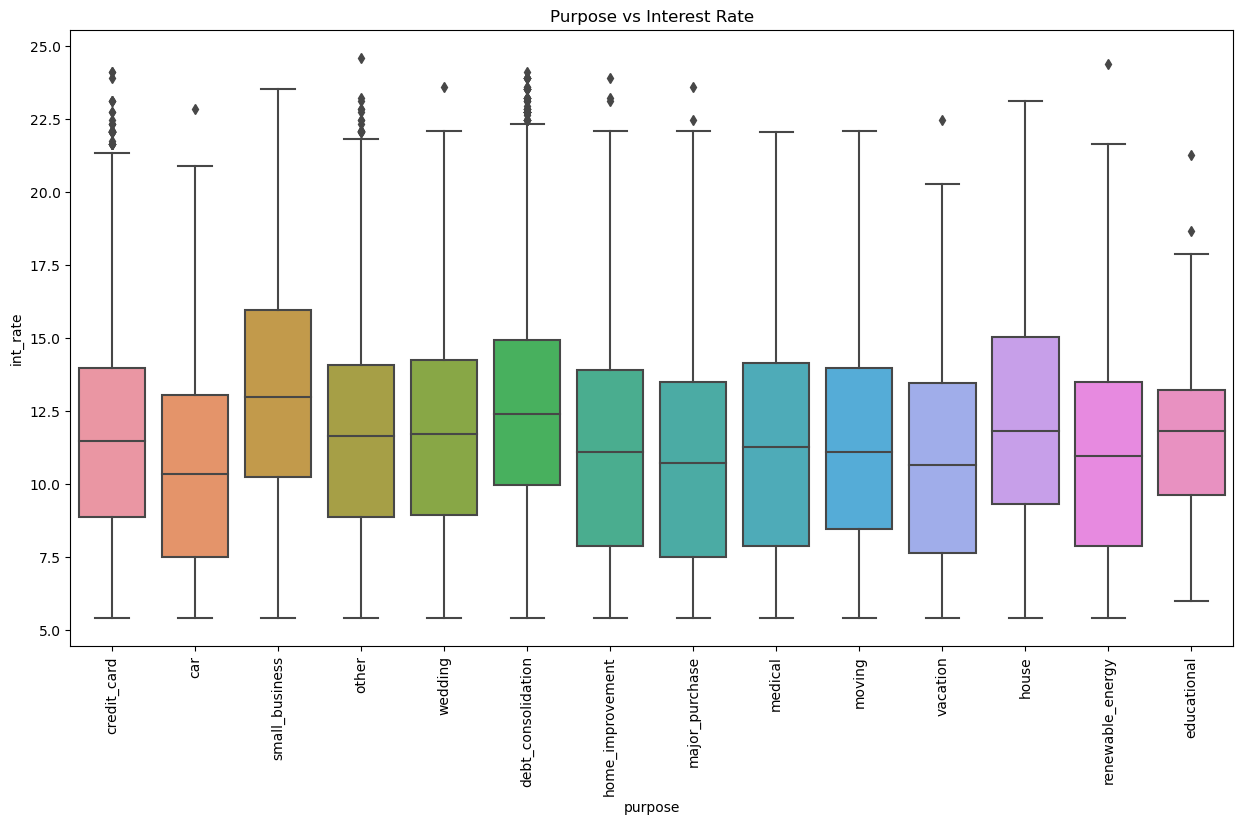

In [1235]:
plt.figure(figsize=[15,8])
plot = sns.boxplot(data=df, x="purpose", y="int_rate"### 1. Purpose vs Annual Income)
plot.set_title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

#### Conclusion:-
    - Interest rate is more for Small Business people

### 3. Purpose vs Revolving Balance

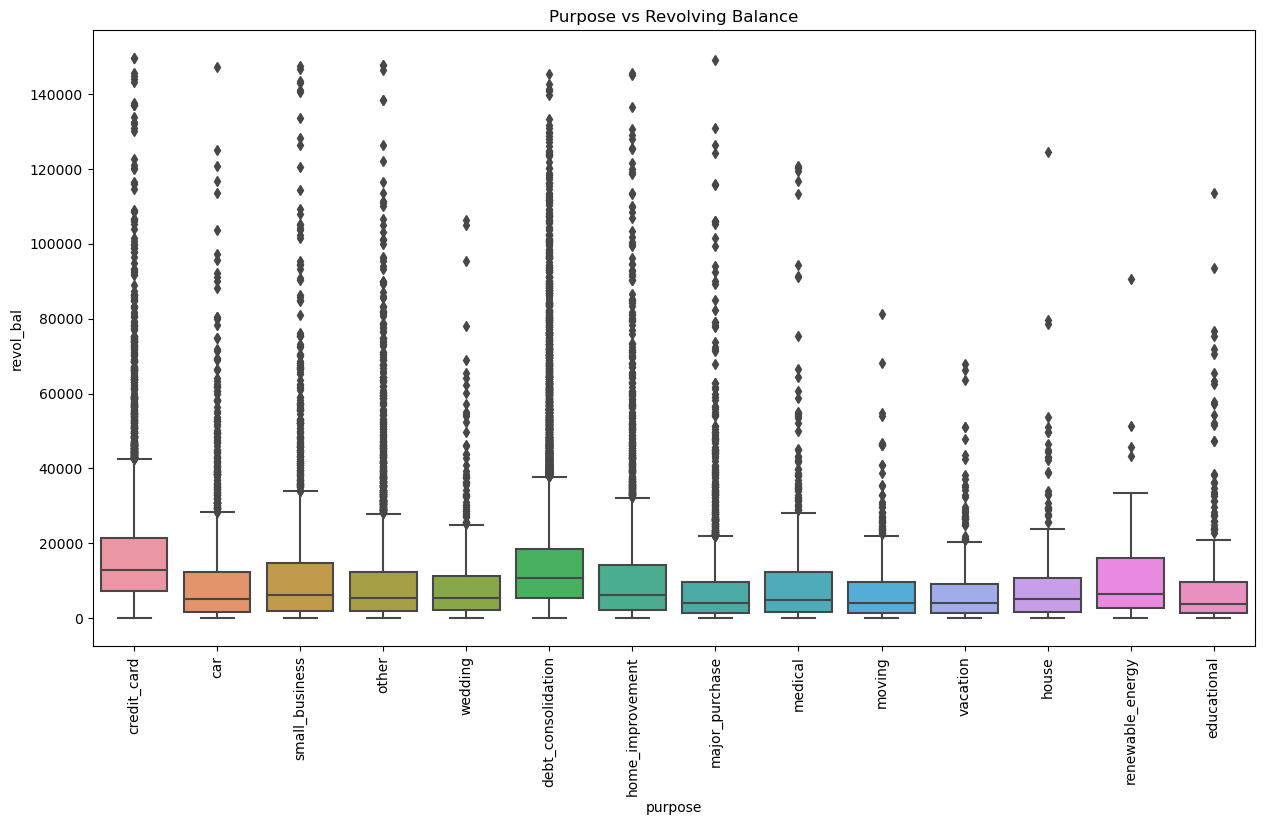

In [1236]:
plt.figure(figsize=[15,8])
plot = sns.boxplot(d### 1. Purpose vs Annual Incomeata=df, x="purpose", y="revol_bal")
plot.set_title("Purpose vs Revolving Balance")
plt.xticks(rotation=90)
plt.show()

#### Conclusion:-
    - Interest rate is more for Small Business people

### 4. Purpose vs Loan Amount

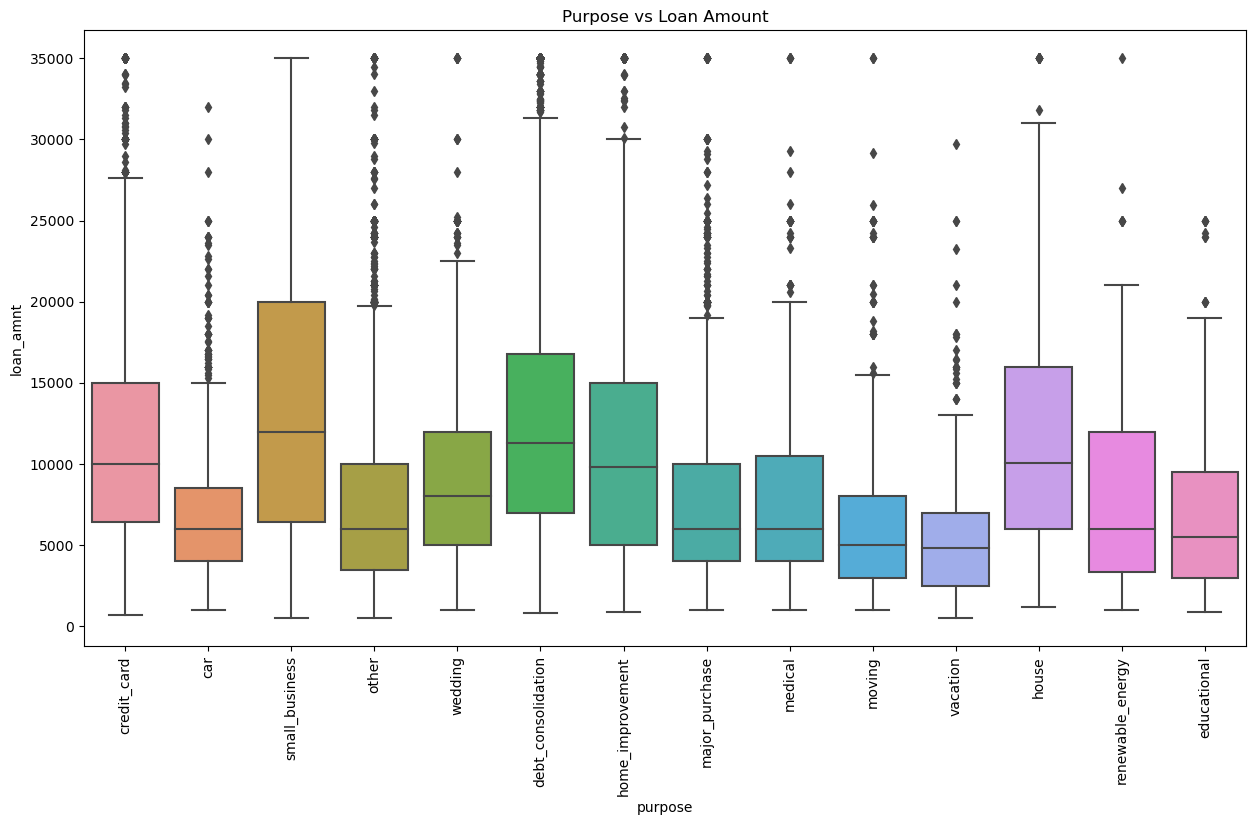

In [1220]:
plt.figure(figsize=[15,8])
plot = sns.boxplot(data=df, x="purpose", y="loan_amnt"### 3. Purpose vs Revolving Balance)
plot.set_title("Purpose vs Loan Amount")
plt.xticks(rotation=90)
plt.show()

#### Conclusion:-
    - Small Business has no outlier and broader range of loan amount 

### 4. Purpose vs Revolving Utilization

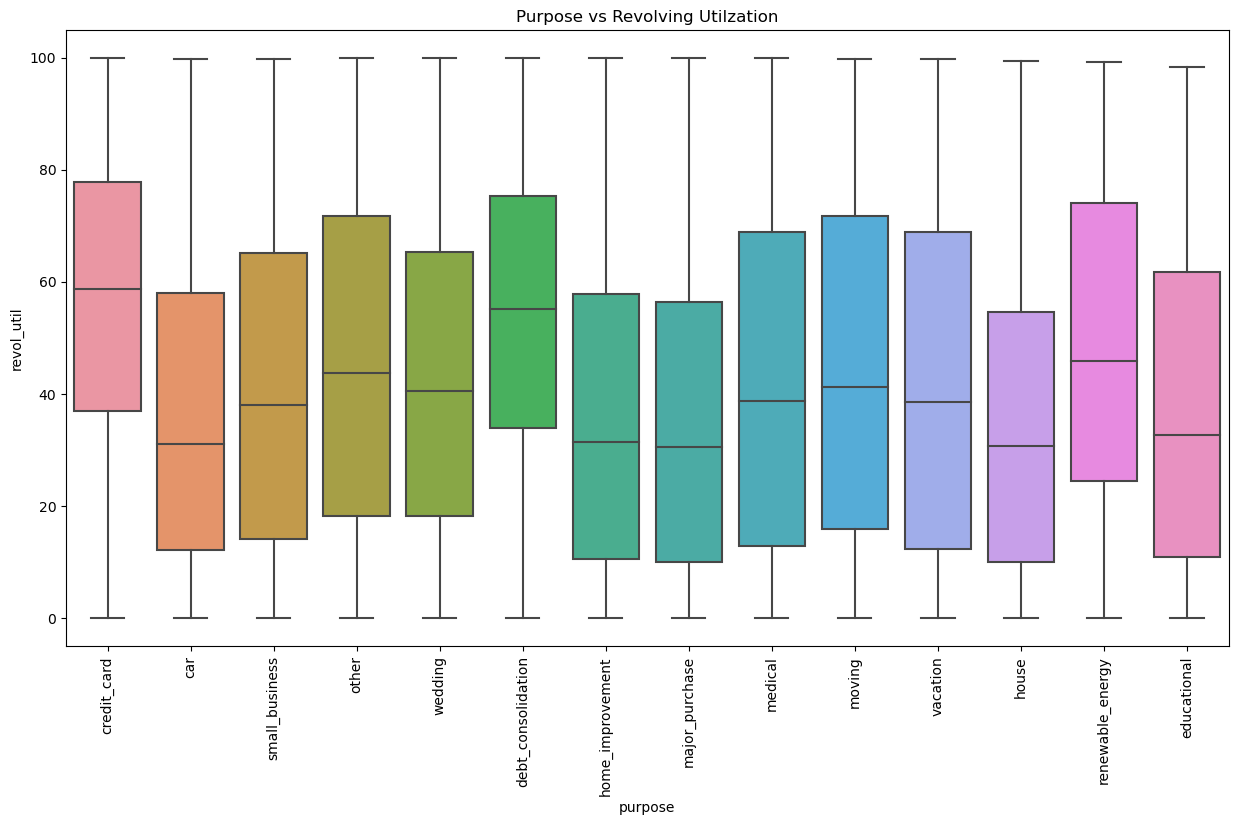

In [1219]:
plt.figure(figsize=[15,8])
plot = sns.boxplot(data=df, x="purpose", y="#### Conclusion:-
    - Interest rate is more for Small Business people### 4. Purpose vs Loan Amount")
plot.set_title("Purpose vs Revolving Utilzation")
plt.xticks(rotation=90)
plt.show()

#### Conclusion:-
    - Anything is difficult to colcude from above

## Pairplot analysis for numerical columns

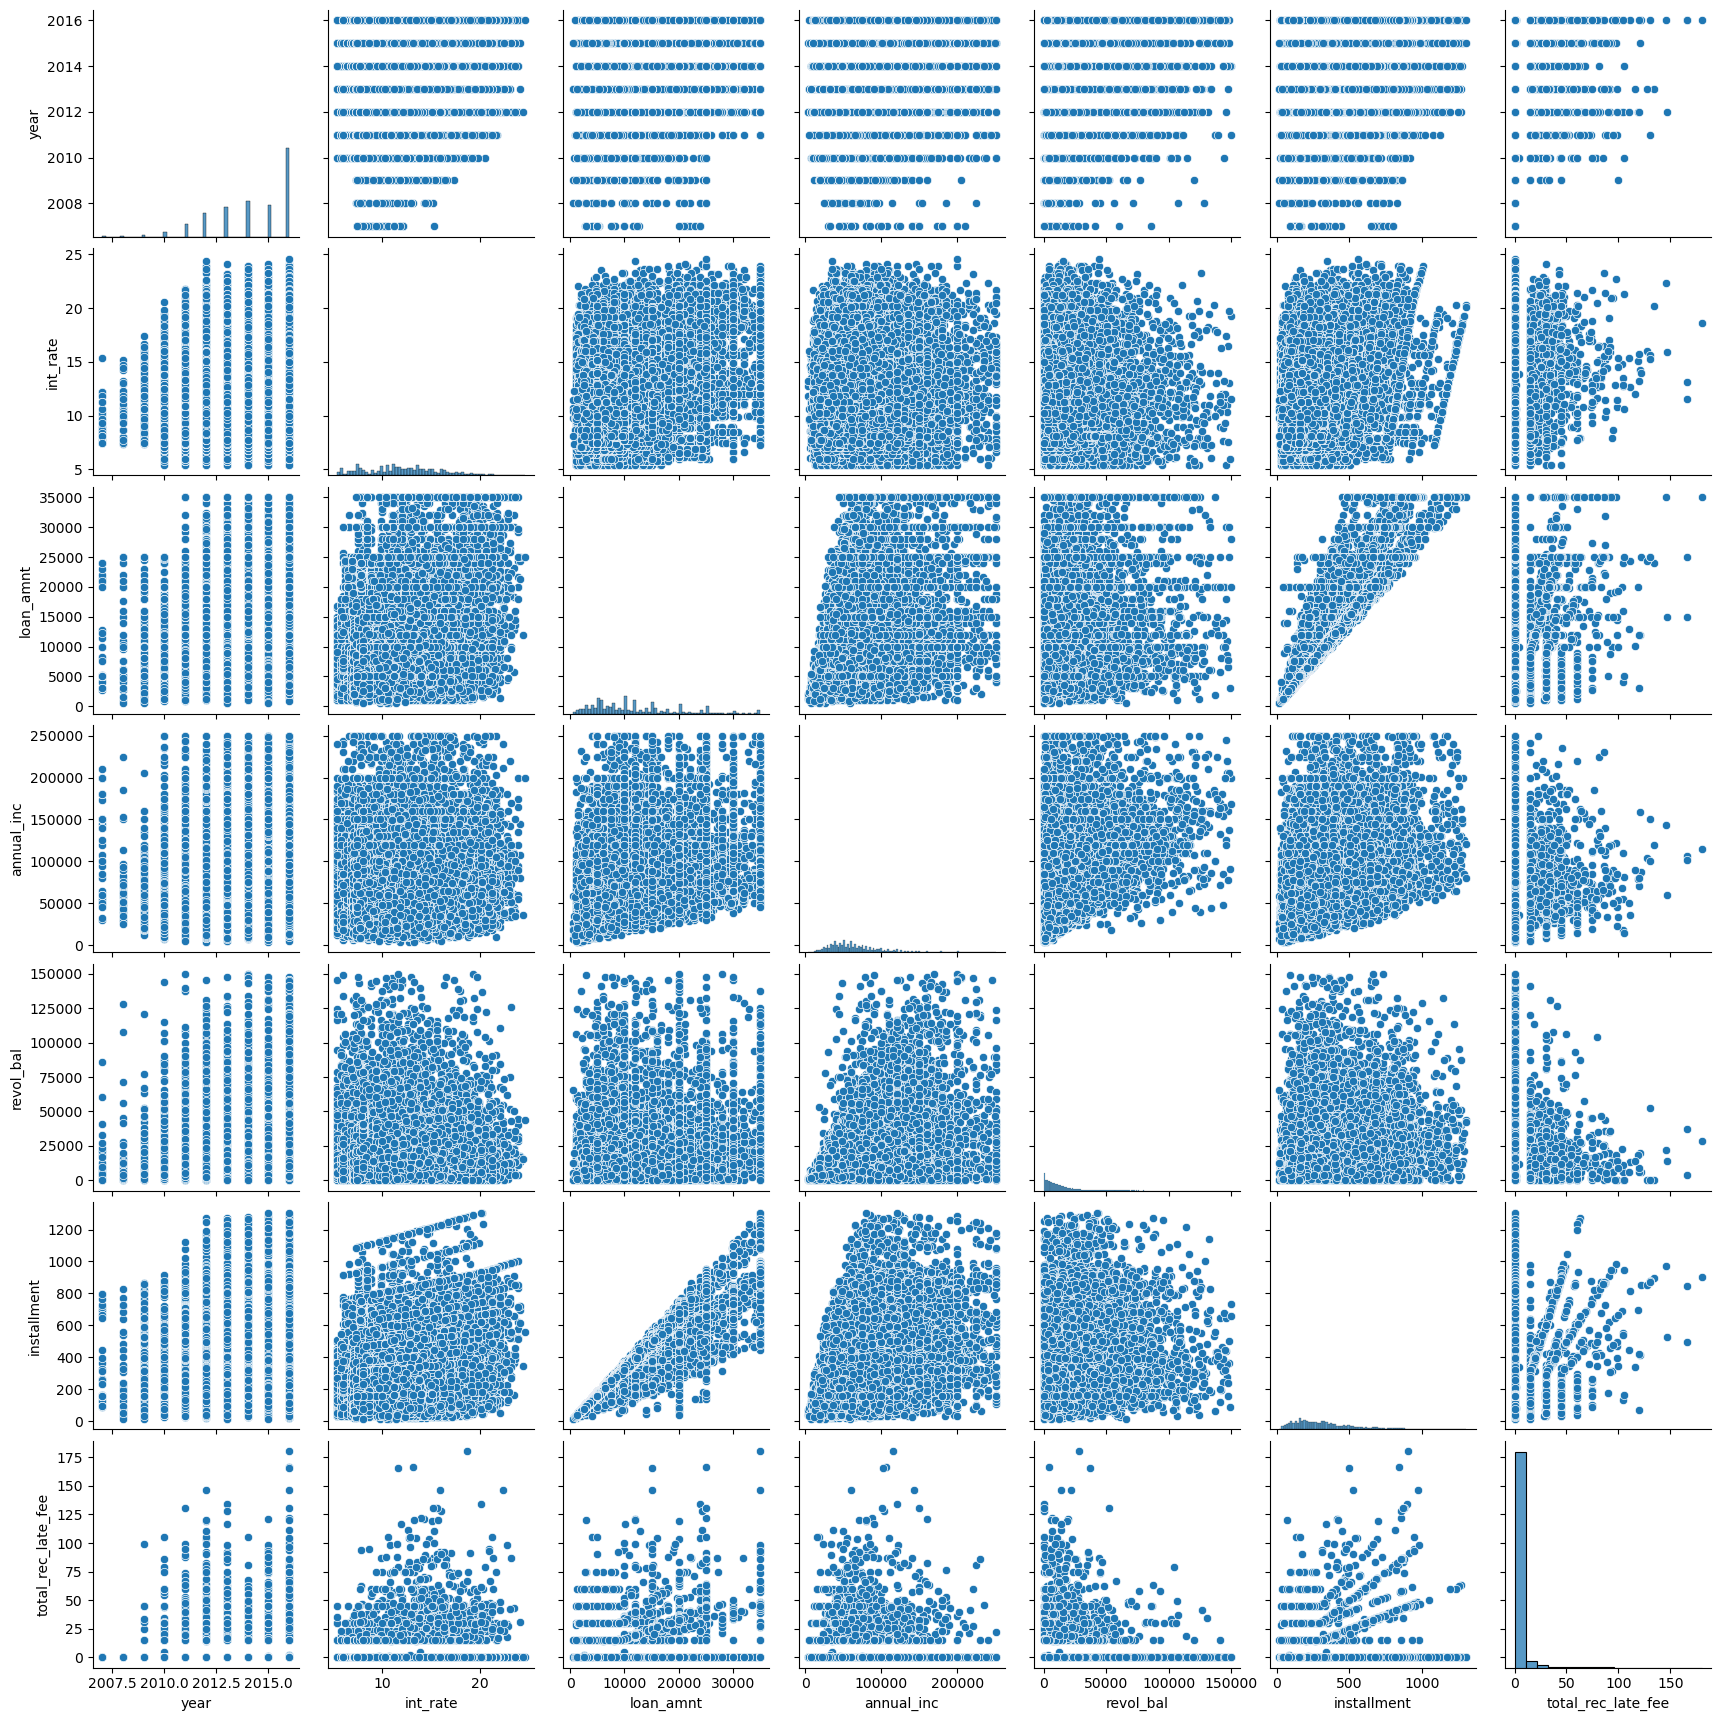

In [1227]:
#Select columns to create pairplot for analysing relationship
#pairplot_col= ["year", "int_rate","loan_amnt","funded_amnt", "annual_inc", "revol_bal", "installment"]
pairplot_col= ["year", "int_rate","loan_amnt", "annual_inc", "revol_bal", "installment","total_rec_late_fee"]
sns.pairplot(df[pairplot_col])
plt.show()

- Insigths:-
    1. As annual income increase late fee is decreasing, it means people pay EMI on time
    2. Late fee is increasing with increasing Installment, People's power to pay EMI is reducing.
    3. With more Annual Income people are paying more EMI
    4. People with higher Income tends to have more revolving balance
    5. With each passing year, Late Fee, loan amount, Installments, Annual income, Interest rate and revolving balance is increasing

### Extras - Bivariate Analysis based on pivot table (this is to check that pivot table and groupby geneates same info)

In [1262]:
df_pivot_loan_annualInc = df.pivot_table(index=["grade"], columns="loan_status", values="annual_inc", aggfunc="count")
print(df_pivot_loan_annualInc)

loan_status  Charged Off  Current  Fully Paid
grade                                        
A                    602       40        9395
B                   1416      344       10180
C                   1338      262        6420
D                   1113      218        3917
E                    703      178        1907
F                    310       72         644
G                     97       17         191


In [1258]:
df.grade.value_counts().index.tolist()
df.loan_status.value_counts().index.tolist()

['Fully Paid', 'Charged Off', 'Current']

In [1265]:
##Plot the stacked bar chart again wrt to the proportions.
df_pivot_loan_annualInc_perc.unstack()
df_pivot_loan_annualInc_perc= df_pivot_loan_annualInc[df.loan_status.value_counts().index.tolist()].apply(lambda x: x/x.sum(), axis=1)
df_pivot_loan_annualInc_perc

loan_status  Fully Paid  Charged Off   Current
grade                                         
A              0.936037     0.059978  0.003985
B              0.852596     0.118593  0.028811
C              0.800499     0.166833  0.032668
D              0.746380     0.212081  0.041540
E              0.684003     0.252152  0.063845
F              0.627680     0.302144  0.070175
G              0.626230     0.318033  0.055738

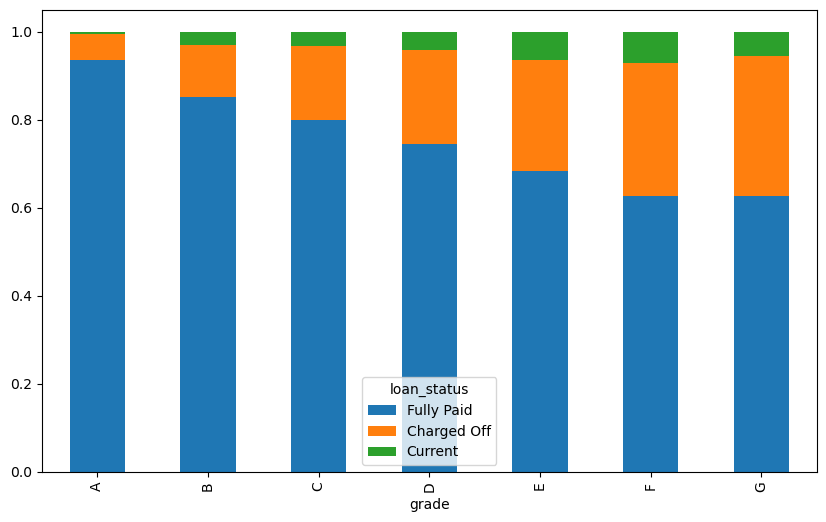

In [1266]:
df_pivot_loan_annualInc_perc.plot(kind="bar", stacked=True, figsize=[10,6])
plt.show()

In [1267]:
df_pivot_loan_annualInc = df.pivot_table(index=["purpose"], columns="loan_status", values="annual_inc", aggfunc="count")
print(df_pivot_loan_annualInc)

loan_status         Charged Off  Current  Fully Paid
purpose                                             
car                       159.0     50.0      1336.0
credit_card               539.0    103.0      4455.0
debt_consolidation       2751.0    582.0     15186.0
educational                56.0      NaN       265.0
home_improvement          337.0     98.0      2469.0
house                      58.0     14.0       301.0
major_purchase            219.0     37.0      1909.0
medical                   105.0     12.0       568.0
moving                     91.0      7.0       477.0
other                     626.0    127.0      3202.0
renewable_energy           19.0      1.0        81.0
small_business            472.0     74.0      1261.0
vacation                   53.0      6.0       321.0
wedding                    94.0     20.0       823.0


In [1276]:
##Plot the stacked bar chart again wrt to the proportions.
df_pivot_loan_annualInc_perc = df_pivot_loan_annualInc_perc.unstack().fillna(0).reset_index()
df_pivot_loan_annualInc_perc= df_pivot_loan_annualInc[df.loan_status.value_counts().index.tolist()].apply(lambda x: x/x.sum(), axis=1)
df_pivot_loan_annualInc_perc

loan_status         Fully Paid  Charged Off   Current
purpose                                              
car                   0.864725     0.102913  0.032362
credit_card           0.874044     0.105748  0.020208
debt_consolidation    0.820023     0.148550  0.031427
educational           0.825545     0.174455       NaN
home_improvement      0.850207     0.116047  0.033747
house                 0.806971     0.155496  0.037534
major_purchase        0.881755     0.101155  0.017090
medical               0.829197     0.153285  0.017518
moving                0.829565     0.158261  0.012174
other                 0.809608     0.158281  0.032111
renewable_energy      0.801980     0.188119  0.009901
small_business        0.697842     0.261206  0.040952
vacation              0.844737     0.139474  0.015789
wedding               0.878335     0.100320  0.021345

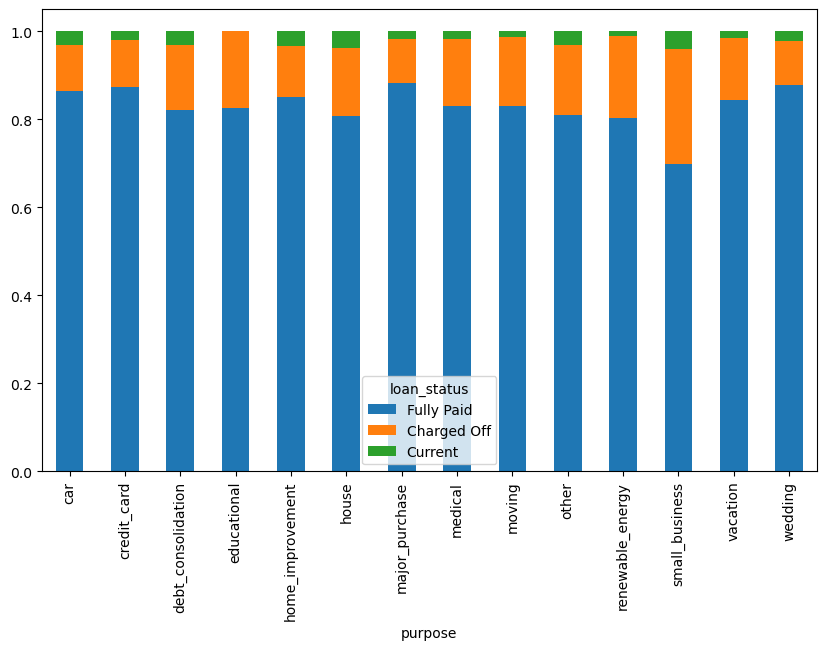

In [1277]:
df_pivot_loan_annualInc_perc.plot(kind="bar", stacked=True, figsize=[10,6])
plt.show()

grade                  A     B     C     D     E    F    G
purpose                                                   
car                  608   496   243   130    56   10    2
credit_card         1396  1644  1061   589   280   99   28
debt_consolidation  3859  5609  3927  2808  1568  585  163
educational           80   102    91    30    13    4    1
home_improvement     949   882   522   293   183   59   16
house                100   105    69    50    28   15    6
major_purchase       829   596   381   228    98   27    6
medical              209   202   135    82    40   14    3
moving               170   185   116    65    26    9    4
other               1082  1207   846   500   218   82   20
renewable_energy      30    37    17     8     4    3    2
small_business       346   470   349   299   200   96   47
vacation             134   126    65    31    21    2    1
wedding              245   279   198   135    53   21    6
grade                      B         A         C        

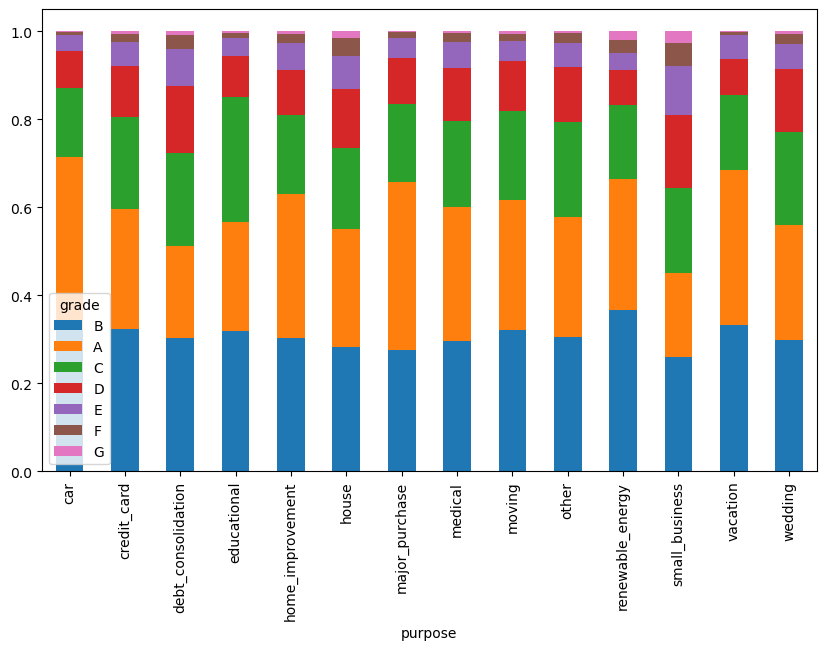

In [1297]:
df_pivot_loan_annualInc = df.pivot_table(index=["purpose"], columns="grade", values="annual_inc", aggfunc="count")
print(df_pivot_loan_annualInc)
##Plot the stacked bar chart again wrt to the proportions.
df_pivot_loan_annualInc_perc = df_pivot_loan_annualInc_perc.unstack().fillna(0).reset_index()
df_pivot_loan_annualInc_perc= df_pivot_loan_annualInc[df.grade.value_counts().index.tolist()].apply(lambda x: x/x.sum(), axis=1)
print(df_pivot_loan_annualInc_perc)
df_pivot_loan_annualInc_perc.plot(kind="bar", stacked=True, figsize=[10,6])
plt.show()

# Final Conclusion-

1. Small business are the riskiest to give loan to.
2. They should be given loan at lower rate or less amount, as these will reduce the risk of default